<a href="https://colab.research.google.com/github/varibeirosoares/mvpmachinelearning_prescricoes_pt/blob/main/MVP_MachineLearning%26Analytics_VanessaRIbeiro_PUCRio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pós-Graduação em Ciência de Dados e Analytics - PUC-Rio
#MVP - Machine Learning & Analytics
#Aluna: Vanessa Ribeiro (Abril/2024)



##Definição do Problema

###1. Descrição do Problema
O problema abordado envolve a previsão do número total de receitas prescritas eletronicamente em um contexto de saúde pública. O objetivo principal é desenvolver um modelo de machine learning que possa prever futuras demandas de prescrições eletrônicas com base em dados históricos. Esta previsão é crucial para a gestão eficiente dos recursos da saúde, planejamento logístico de medicamentos e ajuste de políticas de saúde pública para melhor atender às necessidades da população.

###2. Premissas ou Hipóteses sobre o Problema
Premissa de Sazonalidade: Existe uma expectativa de variação sazonal nas prescrições, possivelmente devido a doenças sazonais como gripes e resfriados, que podem influenciar os padrões de demanda.
Hipótese de Crescimento: Com o aumento da digitalização dos serviços de saúde, presume-se que o número de receitas eletrônicas tenha crescido ao longo dos anos.
Hipótese de Variação Regional: Assume-se que diferentes regiões podem apresentar padrões distintos de prescrição devido a diferenças demográficas, econômicas e de acesso a serviços de saúde.

###3. Restrições ou Condições para Seleção dos Dados
Restrições Temporais: Os dados são restritos ao período entre 2014 e 2023, limitando a análise a este intervalo.
Condições de Acesso: A análise é feita com base em dados disponíveis publicamente, o que implica que certos detalhes mais específicos ou sensíveis podem não estar disponíveis devido a restrições de privacidade ou segurança.
Granularidade Geográfica: Os dados são agrupados por região de saúde, o que impede análises mais detalhadas no nível de cidades ou estabelecimentos individuais.

###4. Descrição do Dataset

Atributos:
Período: Data de registro (ano-mês).

Região: Região de saúde onde as prescrições foram registradas.

Nº Total Receitas Prescritas Eletrónicas (Qt): Quantidade total de receitas eletrônicas prescritas.

Nº Embalagens Prescritas por DCI (CNPEM) (Qt): Quantidade de embalagens prescritas segundo a Denominação Comum Internacional.

Nº Embalagens Prescritas por Marca por Exceção A/B/C (Qt): Quantidades de embalagens prescritas por marca, diferenciadas por exceções A, B e C.

Nº Embalagens Prescritas Sem Necessidade de Justificação Técnica (Qt): Quantidade de embalagens prescritas sem a necessidade de justificação técnica.

##Preparação dos dados:




In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# indicando a url do arquivo

url = 'https://drive.google.com/uc?export=download&id=1Ohgpbmj-rzsNYMlWbp4ixl05CjBjtuEh'

df = pd.read_csv(url)

# Verifique as primeiras linhas do dataframe
print(df.head())



  Período;Região;Nº Total Receitas Prescritas Eletrónicas (Qt);Nº Embalagens Prescritas por DCI (CNPEM) (Qt);Nº Embalagens Prescritas por Marca por Exceção A (Qt);Nº Embalagens Prescritas por Marca por Exceção B (Qt);Nº Embalagens Prescritas por Marca por Exceção C (Qt);Nº Embalagens Prescritas Sem Necessidade de Justificação Técnica (Qt)
0  2014-01;Região de Saúde LVT;879959;655748;1232...                                                                                                                                                                                                                                                                                                
1  2014-02;Região de Saúde LVT;482426;205110;1025...                                                                                                                                                                                                                                                                          

O dataset parece estar utilizando ponto e vírgula (;) como separador de colunas, o que não foi automaticamente detectado na leitura inicial. Vou corrigir isso e dar uma olhada nas primeiras linhas novamente para termos uma visão clara dos dados.

In [2]:
# Corrigindo o separador e recarregando o dataset
df = pd.read_csv(url, sep=';')

# Exibir as primeiras linhas do dataset corrigido
df.head()


,Período,Região,Nº Total Receitas Prescritas Eletrónicas (Qt),Nº Embalagens Prescritas por DCI (CNPEM) (Qt),Nº Embalagens Prescritas por Marca por Exceção A (Qt),Nº Embalagens Prescritas por Marca por Exceção B (Qt),Nº Embalagens Prescritas por Marca por Exceção C (Qt),Nº Embalagens Prescritas Sem Necessidade de Justificação Técnica (Qt)
0,2014-01,Região de Saúde LVT,879959,655748,12326,45159,615667,0
1,2014-02,Região de Saúde LVT,482426,205110,10253,24544,436306,0
2,2014-03,Região de Saúde do Algarve,61938,0,519,1184,86226,0
3,2014-05,Região de Saúde LVT,705880,401751,12046,18100,473308,0
4,2014-06,Região de Saúde do Alentejo,93463,52269,745,1181,62498,0


O dataset foi carregado corretamente e possui as seguintes colunas:

Período: Data no formato ano-mês.

Região: A região de saúde.

Nº Total Receitas Prescritas Eletrónicas (Qt): Quantidade total de receitas prescritas eletronicamente.

Nº Embalagens Prescritas por DCI (CNPEM) (Qt): Quantidade de embalagens prescritas por DCI.

Nº Embalagens Prescritas por Marca por Exceção A (Qt): Quantidade de embalagens prescritas por marca, exceção A.

Nº Embalagens Prescritas por Marca por Exceção B (Qt): Quantidade de embalagens prescritas por marca, exceção B.

Nº Embalagens Prescritas por Marca por Exceção C (Qt): Quantidade de embalagens prescritas por marca, exceção C.

Nº Embalagens Prescritas Sem Necessidade de Justificação Técnica (Qt): Quantidade de embalagens prescritas sem necessidade de justificação técnica.


In [3]:
# Tratar a coluna 'Período' para formato datetime
df['Período'] = pd.to_datetime(df['Período'], format='%Y-%m')

# Ordenar o dataset por 'Período' para garantir a ordem cronológica
df.sort_values('Período', inplace=True)

# Criando a coluna mês para ser utilizada posteriormente no treinamento de modelos
df['Mês'] = df['Período'].dt.month

# Vamos assumir que os dados mais recentes serão usados como conjunto de teste
# Para um split temporal, vamos usar os últimos 12 meses como teste
data_train = df.iloc[:-12]
data_test = df.iloc[-12:]

# Separação das features e target
X_train = data_train.drop(['Nº Total Receitas Prescritas Eletrónicas (Qt)', 'Período', 'Região'], axis=1)
y_train = data_train['Nº Total Receitas Prescritas Eletrónicas (Qt)']
X_test = data_test.drop(['Nº Total Receitas Prescritas Eletrónicas (Qt)', 'Período', 'Região'], axis=1)
y_test = data_test['Nº Total Receitas Prescritas Eletrónicas (Qt)']

# Normalização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Para um modelo de séries temporais, a validação cruzada deve ser adaptada para séries temporais
# (ex: TimeSeriesSplit), pois a validação cruzada tradicional não respeita a ordem temporal dos dados.

# Salvando as versões transformadas dos dados para uso posterior
transformed_data = {
    "X_train_scaled": X_train_scaled,
    "y_train": y_train.values,
    "X_test_scaled": X_test_scaled,
    "y_test": y_test.values
}

transformed_data.keys()

dict_keys(['X_train_scaled', 'y_train', 'X_test_scaled', 'y_test'])

Vamos começar tratando o campo "Período" para que possamos manipulá-lo corretamente em análises temporais. Depois, separaremos os dados para treino e teste. Vou preparar os dados temporalmente, considerando a natureza da série temporal do dataset.

​Os dados foram preparados com as seguintes etapas:

1. A coluna "Período" foi tratada para o formato datetime e os dados foram
ordenados cronologicamente.

2. O dataset foi separado em conjuntos de treino e teste, com os últimos 12 meses destinados ao teste, respeitando a ordem temporal para análise de séries temporais.

3. As colunas "Período" e "Região" foram removidas das features, junto com a coluna alvo "Nº Total Receitas Prescritas Eletrónicas (Qt)" para separar os conjuntos de features (X) e alvo (y).

4. Foi incluída a coluna "Mês"

5. Os dados de features foram normalizados usando StandardScaler para garantir que a escala dos diferentes tipos de prescrição não afete negativamente o desempenho dos modelos de machine learning.

Os dados transformados estão salvos e prontos para serem utilizados nos modelos. As versões transformadas dos conjuntos de dados incluem "X_train_scaled", "y_train", "X_test_scaled", e "y_test", que estão prontos para treinamento e teste de modelos de previsão.

##Modelagem e Treinamento

Nesta etapa vammos montar os pipelines para modelagem e treinamento dos modelos que entendo como mais adequados para este tipo de problema. Nesse caso vamos utilizar:
Linear Regression
Ridge Regression
Lasso Regression
KNN
Decision Tree
SVM



In [4]:
# Dicionário de modelos
models = {
    'Linear Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', LinearRegression())
    ]),
    'Ridge Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', Ridge())
    ]),
    'Lasso Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', Lasso())
    ]),
    'KNN Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', KNeighborsRegressor())
    ]),
    'Decision Tree': Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', DecisionTreeRegressor())
    ]),
    'SVM': Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', SVR())
    ])
}

# Treinando todos os modelos
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} treinado.")

Linear Regression treinado.
Ridge Regression treinado.
Lasso Regression treinado.
KNN Regression treinado.
Decision Tree treinado.
SVM treinado.


##Avaliação de resultados

Agora vamos avaliar os resultados utilizando vários tipos de métricas no treinamento da base teste.

Mean Absolute Error (MAE): Média dos valores absolutos dos erros. Dá uma ideia do erro médio em unidades da variável dependente.

Mean Squared Error (MSE): Média dos quadrados dos erros. Mais sensível a outliers do que o MAE.

Root Mean Squared Error (RMSE): Raiz quadrada do MSE. Está nas mesmas unidades que a variável dependente e dá uma ideia do erro típico.

R² Score: Fornece uma indicação de quão bem os resultados observados são replicados pelo modelo. Um valor de 1 indica um ajuste perfeito.

In [5]:
# Dicionário para armazenar as métricas
results = {}

# Avaliando a performance
for name, model in models.items():
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)

    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R^2': r2}

# Imprimindo os resultados
for name, metrics in results.items():
    print(f"\n{name} Performance:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


Linear Regression Performance:
MAE: 293097.0901
MSE: 147482122985.3637
RMSE: 384034.0128
R^2: 0.6360

Ridge Regression Performance:
MAE: 292732.7101
MSE: 146224173546.9589
RMSE: 382392.6955
R^2: 0.6391

Lasso Regression Performance:
MAE: 293099.5382
MSE: 147483904901.1927
RMSE: 384036.3328
R^2: 0.6360

KNN Regression Performance:
MAE: 50658.9000
MSE: 4717979752.5733
RMSE: 68687.5517
R^2: 0.9884

Decision Tree Performance:
MAE: 233864.4167
MSE: 180975957549.5833
RMSE: 425412.6909
R^2: 0.5533

SVM Performance:
MAE: 593628.8316
MSE: 439526234940.7792
RMSE: 662967.7480
R^2: -0.0848


Para facilitar a leitura dos resultados, vamos plotar um gráfico com a comparação dos modelos nas diversas métricas.

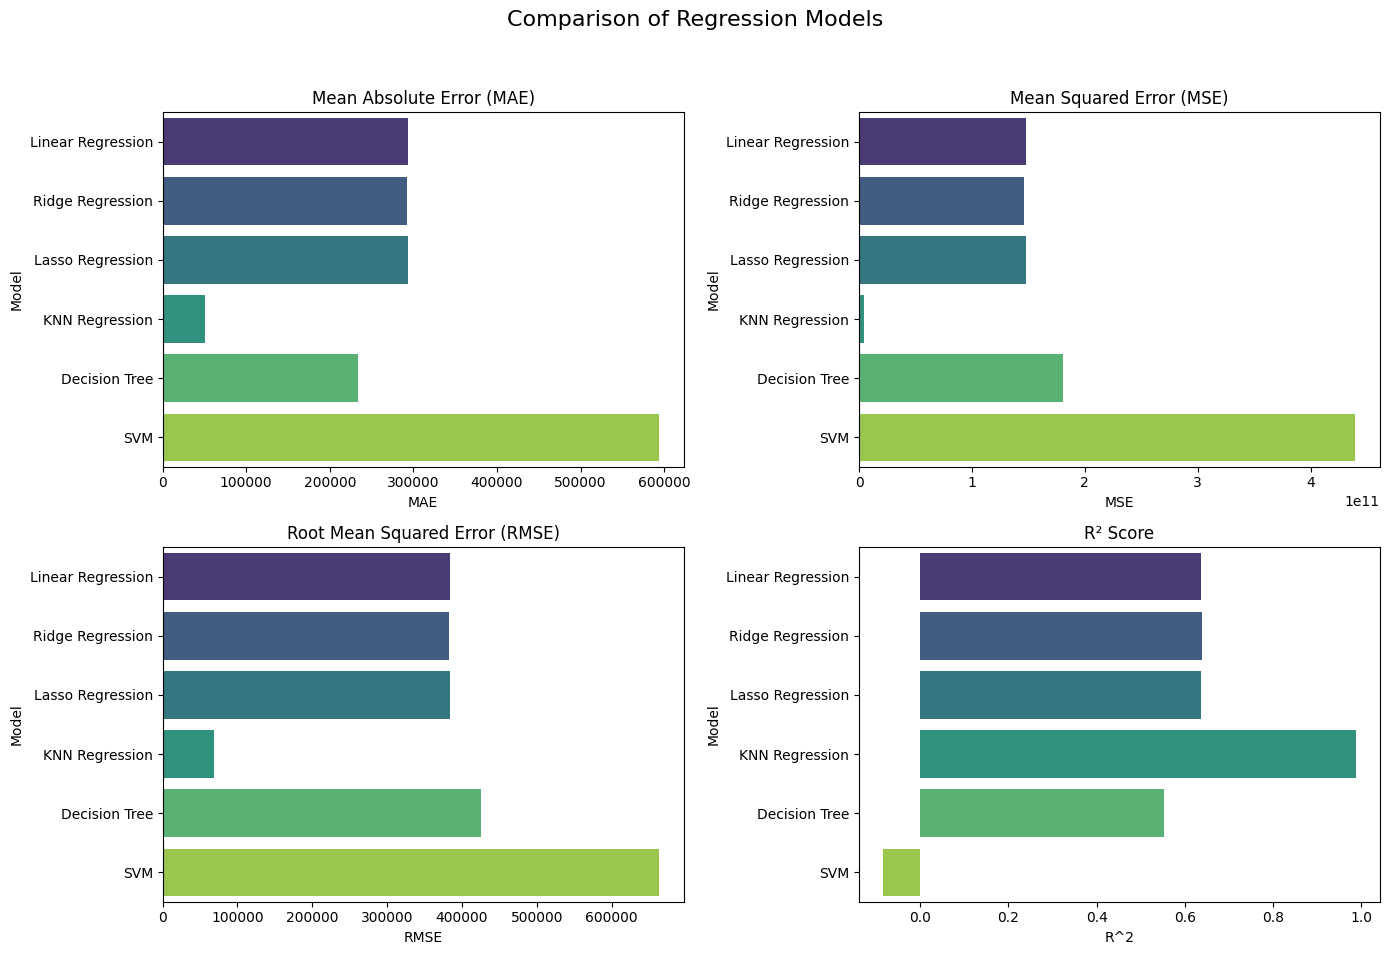

In [6]:
# Converter o dicionário de resultados em DataFrame para facilitar a plotagem
df_metrics = pd.DataFrame(results).T  # Transposta para ter os modelos nas linhas e métricas nas colunas

# Resetando o índice para usar os nomes dos modelos como uma coluna
df_metrics.reset_index(inplace=True)
df_metrics.rename(columns={'index': 'Model'}, inplace=True)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # Subplots para cada métrica
fig.suptitle('Comparison of Regression Models', fontsize=16)

# MAE
sns.barplot(x='MAE', y='Model', hue='Model', data=df_metrics, ax=axes[0, 0], palette='viridis', legend=False)
axes[0, 0].set_title('Mean Absolute Error (MAE)')

# MSE
sns.barplot(x='MSE', y='Model', hue='Model', data=df_metrics, ax=axes[0, 1], palette='viridis', legend=False)
axes[0, 1].set_title('Mean Squared Error (MSE)')

# RMSE
sns.barplot(x='RMSE', y='Model', hue='Model', data=df_metrics, ax=axes[1, 0], palette='viridis', legend=False)
axes[1, 0].set_title('Root Mean Squared Error (RMSE)')

# R² Score
sns.barplot(x='R^2', y='Model', hue='Model', data=df_metrics, ax=axes[1, 1], palette='viridis', legend=False)
axes[1, 1].set_title('R² Score')

# Ajustando layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajusta o layout principal para deixar espaço para o título

# Mostrar o gráfico
plt.show()

**KNN Regression teve a melhor avaliação em todas as métricas, sendo considerado assim o melhor modelo proposto para este problema com este dataset.**